In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display

designs = """
    design01-hx8k
    design02-hx1k
    design02-hx8k
    design03-up5k
""".split()

tools = """
    arachne
    nextpnr
""".split()

data = dict()

for d in designs:
    for i in range(10):
        for t in tools:
            maxfreq = None
            runtime = None
            with open("%s-%d-%s.log" % (d, i, t), "r") as f:
                for line in f:
                    line = line.split("=")
                    runtime = float(line[1]) / 60
            with open("%s-%d-%s.rpt" % (d, i, t), "r") as f:
                for line in f:
                    if line.startswith("Total path delay:"):
                        line = line.split()
                        maxfreq = 1000 / float(line[3])
            data[d, i, t] = (maxfreq, runtime)

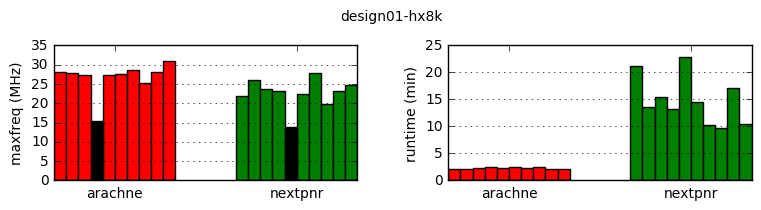

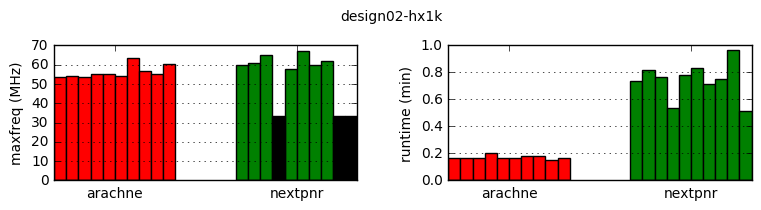

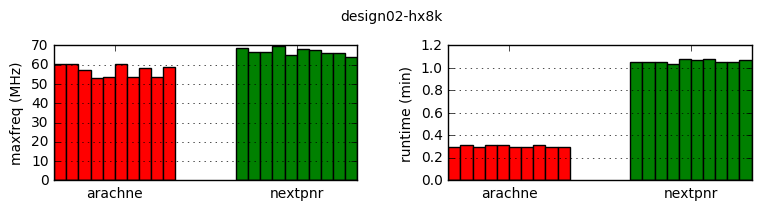

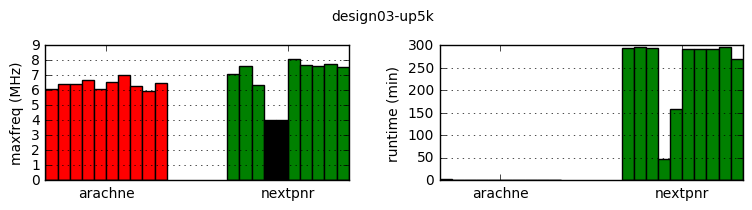

In [2]:
for d in designs:
    plt.figure(figsize=(9, 2))
    for data_idx, data_title, data_unit in [(0, "maxfreq", "MHz"), (1, "runtime", "min")]:
        plt.subplot(1, 2, data_idx+1)
        for xoff, t, c in [(0, "arachne", "r"), (15, "nextpnr", "g")]:
            y = np.zeros(10)
            y2 = np.zeros(10)
            null_y = 0
            for i in range(10):
                v = data[d, i, t][data_idx]
                y[i] = v if v is not None else 0.0
                y2[i] = 1.0 if v is None else 0.0
            plt.bar(xoff+np.arange(10), y, 1, color=c)
            plt.bar(xoff+np.arange(10), y2 * np.max(y)/2, 1, color='k')
        plt.ylabel("%s (%s)" % (data_title, data_unit))
        plt.xticks([5, 20], ["arachne", "nextpnr"])
        plt.grid(axis="y")
    plt.suptitle(d)
    plt.subplots_adjust(wspace=0.3, top=0.8)
    plt.show()

In [3]:
html = list()

html.append('<table>\n')
html.append('<tr><td></td><th colspan=2 style="text-align:center">maxfreq</th>'
            '<th colspan=2 style="text-align:center">runtime</th></tr>\n')
html.append('<tr><th style="text-align:center">design</th>'
            '<th style="text-align:center">arachne</th><th style="text-align:center">nextpnr</th>'
            '<th style="text-align:center">arachne</th><th style="text-align:center">nextpnr</th></tr>\n')

for d in designs:
    html.append("<tr><td>%s</td>" % d)
    for data_idx, data_title, data_unit in [(0, "maxfreq", "MHz"), (1, "runtime", "min")]:
        for t in tools:
            vals = np.array([v for v in [data[d, i, t][data_idx] for i in range(10)] if v is not None])
            html.append('<td style="text-align:right">%.2f (&plusmn; %.2f) %s</td>' % (np.mean(vals), np.std(vals), data_unit))
    html.append("</tr>\n")
    
html.append("</table>\n")
display(HTML("".join(html)))